In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64

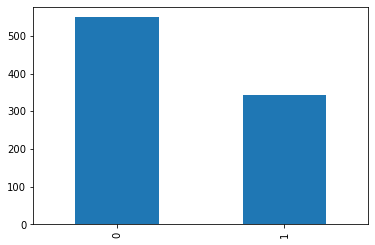

In [9]:
df["Survived"].value_counts().plot(kind="bar")
df["Survived"].value_counts()

Our dataset shows that there were 549 passengers who died while 342 survived.

<AxesSubplot:>

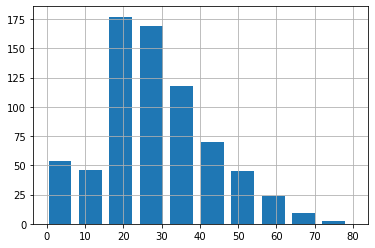

In [10]:
df["Age"].hist(width=6)

<AxesSubplot:>

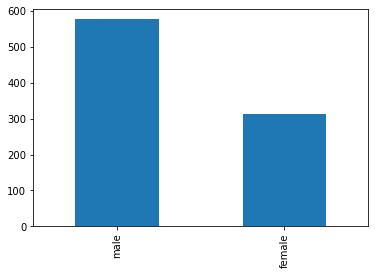

In [11]:
df["Sex"].value_counts().plot(kind="bar")

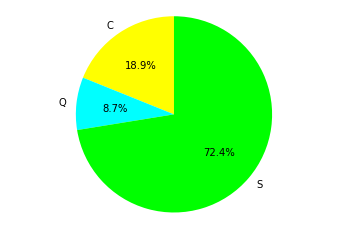

In [12]:
labels="C","Q","S"
sizes=[sum(df["Embarked"]=="C"),sum(df["Embarked"]=="Q"),sum(df["Embarked"]=="S")]
colors=["yellow","aqua","lime"]
plt.pie(sizes, labels=labels, colors=colors,autopct='%.1f%%',startangle=90)
#autopct--f%=value or function,(.1) says we want one digits after decimal point
plt.axis('equal')
plt.show()

## Comparing survival rates among different variables

In [13]:
def survival_stacked(variable):
    Died=df[df["Survived"]==0][variable].value_counts()/len(df["Survived"]==0)
    Survived=df[df["Survived"]==1][variable].value_counts()/len(df["Survived"]==1)
    data=pd.DataFrame([Died,Survived])
    data.index=["Did not survived","Survived"]
    data.plot(kind="bar",stacked=True,title="Percentage")
    return data.head()

,male,female
Did not survived,0.525253,0.090909
Survived,0.122334,0.261504


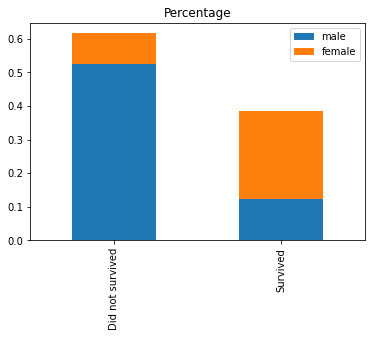

In [14]:
survival_stacked('Sex')

We can see from the plot that females tend to survived more than males.

,1,2,3
Did not survived,0.089787,0.108866,0.417508
Survived,0.152637,0.097643,0.133558


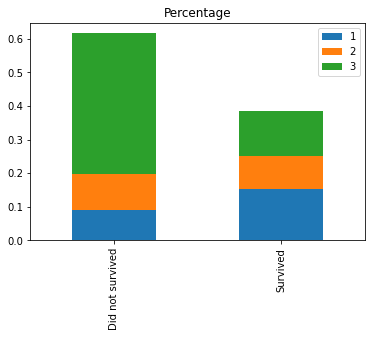

In [15]:
survival_stacked('Pclass')

Survival rate of class 1 is more and death rate of class 3 is more.

,S,C,Q
Did not survived,0.479237,0.084175,0.05275
Survived,0.243547,0.104377,0.03367


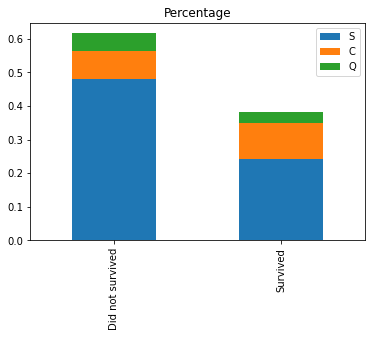

In [16]:
survival_stacked("Embarked")

Embark S and Q has more deaths than Embark C where survival chance is more.

,0,1,2,3,4,5,8
Did not survived,0.446689,0.108866,0.016835,0.013468,0.016835,0.005612,0.007856
Survived,0.235690,0.125701,0.014590,0.004489,0.003367,NaN,NaN


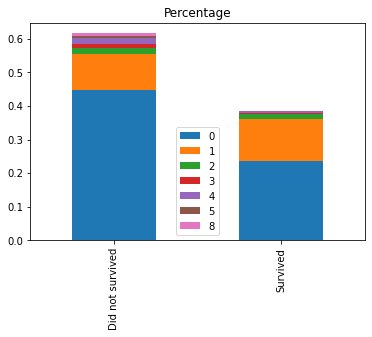

In [17]:
survival_stacked("SibSp")

,0,1,2,3,4,5,6
Did not survived,0.499439,0.059484,0.044893,0.002245,0.004489,0.004489,0.001122
Survived,0.261504,0.072952,0.044893,0.003367,NaN,0.001122,NaN


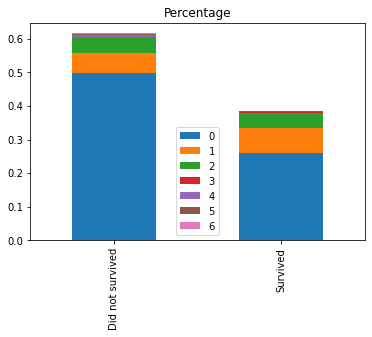

In [18]:
survival_stacked("Parch")

passengers that boarded alone have a lower survival rate compared to those that board with parents or children.

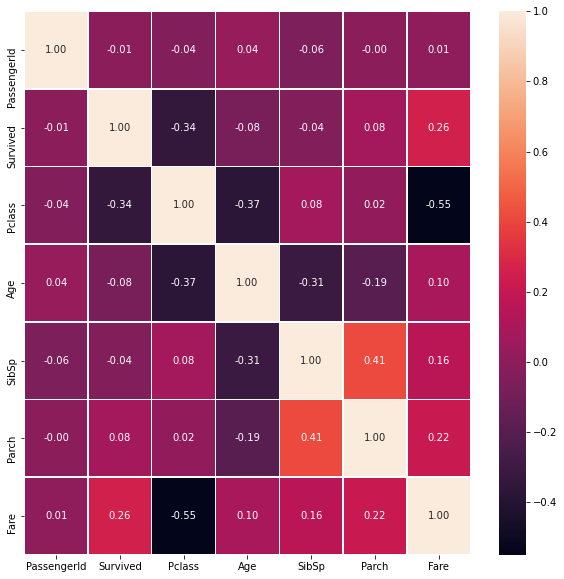

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,fmt= '.2f')
plt.show()

"sex" and "survived":
--As shown in the plots above, it is quite obvious that females tend to have a higher survival rate than males.

"Pclass" and "fare":
--A passenger with a higher social-economic status would most likely pay a higher fare, hence the relatively high correlation between the 2 variables.

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


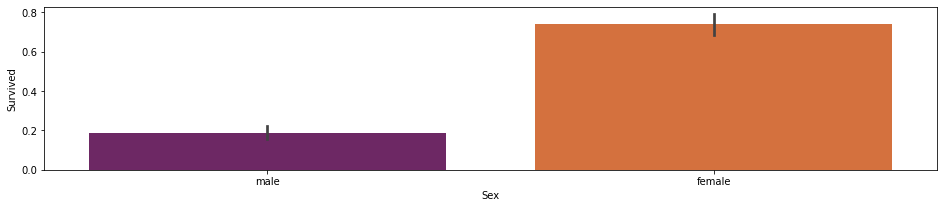

In [21]:
plt.figure(figsize=(16,3))
sns.barplot(y='Survived',x='Sex',data=df,palette='inferno')
plt.show()

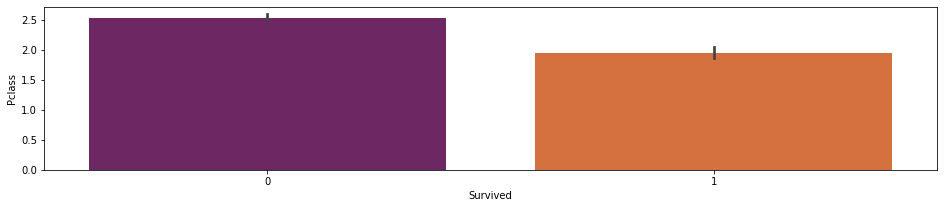

In [22]:
plt.figure(figsize=(16,3))
sns.barplot(x='Survived',y='Pclass',data=df,palette='inferno')
plt.show()

,0,1
Did not survived,0.090909,0.525253
Survived,0.261504,0.122334


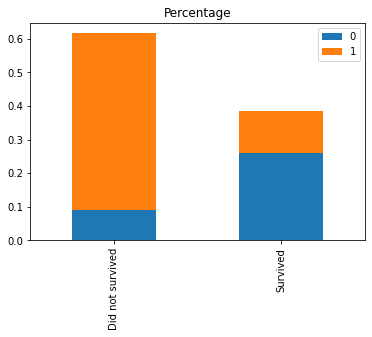

In [23]:
#Encoding "Sex"
sex_map={"male":1,"female":0}
df["Sex"]=df["Sex"].map(sex_map)
survival_stacked("Sex")

In [24]:
df.insert(value=df.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")

In [25]:
title_map={"Capt": "Officer",
            "Col": "Officer",
            "Major": "Officer",
            "Jonkheer": "Royalty",
            "Don": "Royalty",
            "Sir" : "Royalty",
            "Dr": "Officer",
            "Rev": "Officer",
            "the Countess":"Royalty",
            "Dona": "Royalty",
            "Mme":  "Mrs",
            "Mlle": "Miss",
            "Ms": "Mrs",
            "Mr" : "Mr",
            "Mrs" : "Mrs",
            "Miss" : "Miss",
            "Master" : "Master",
            "Lady" : "Royalty"}
df["Title"]=df.Title.map(title_map)

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Dealing with the Missing value of Age and imputing it with median of Pclass and SibSp both combined/groupby.

In [27]:
df_1=df.groupby(["Pclass","SibSp"])
df_1_median=df_1.median()
df_1_median

PassengerId  Survived  Sex   Age  Parch      Fare
Pclass SibSp                                                   
1      0            476.0       1.0  1.0  37.0    0.0   39.6000
       1            485.0       1.0  0.0  38.0    0.0   79.2000
       2            572.0       1.0  0.0  44.0    0.0  133.6500
       3             89.0       1.0  0.0  23.0    2.0  263.0000
2      0            407.0       0.0  1.0  30.0    0.0   13.0000
       1            451.0       1.0  0.0  29.0    1.0   26.0000
       2            565.5       0.5  1.0  23.5    1.0   39.0000
       3            727.0       1.0  0.0  30.0    0.0   21.0000
3      0            472.0       0.0  1.0  26.0    0.0    7.8958
       1            372.0       0.0  1.0  25.0    0.0   15.5500
       2            334.0       0.0  1.0  19.5    0.0   19.2583
       3            302.5       0.0  0.0   6.0    1.0   25.4667
       4            264.5       0.0  1.0   6.5    1.5   31.2750
       5            387.0       0.0  1.0  11.0    2.0   46.9000
       8            325.0       0.0  1.0   NaN    2.0   69.5500

In the following function,medians of each group will be used to replace the missing values in the "Age" based on their groups (Pclass and SibSp).

In [28]:
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()    #used the median age of Pclass=3 as a replacement as there is no median value for SibSp=8 in training dataset

In [29]:
df["Age"]=df["Age"].fillna(fill_age(df,df_1_median))

Dealing with the Cabin Missing Values

In [30]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
df["Cabin"]=df["Cabin"].fillna("U")
df["Cabin"]=df["Cabin"].map(lambda x: x[0])

We create a column for each cabin and insert the value "1" if the passenger belongs to that cabin and "0" if the passenger do not belong to it. We only create columns for cabin A,B,C,D,E,F,G,T and LEFT OUT CABIN U in the columns created in order to prevent collinearity. Passengers in Cabin U would have values "0" for all the cabins columns (A,B,C,D,E,F,G,T).

In [32]:
df["Cabin A"]=np.where(df["Cabin"]=="A",1,0)
df["Cabin B"]=np.where(df["Cabin"]=="B",1,0)
df["Cabin C"]=np.where(df["Cabin"]=="C",1,0)
df["Cabin D"]=np.where(df["Cabin"]=="D",1,0)
df["Cabin E"]=np.where(df["Cabin"]=="E",1,0)
df["Cabin F"]=np.where(df["Cabin"]=="F",1,0)
df["Cabin G"]=np.where(df["Cabin"]=="G",1,0)
df["Cabin T"]=np.where(df["Cabin"]=="T",1,0)
df["Cabin U"]=np.where(df["Cabin"]=="U",1,0)

Since there's only 2 missing values in "Embarked", I would just replace it with "S" as a huge majority (72.4%) embarked on S.

In [33]:
df["Embarked"]=df["Embarked"].fillna("S")

In [34]:
def new_embark_features(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0)

In [35]:
new_embark_features(df)

In [36]:
df["Fare"]=df["Fare"].fillna(np.mean(df["Fare"]))

In [37]:
title_map2={'Mr':1, 
           'Mrs':1, 
           'Miss':1,
           'Master':2,
           'Officer':3,
           'Royalty':4}
df["Title"]=df["Title"].map(title_map2)

In [38]:
df["FamilySize"]=df["SibSp"]+df["Parch"]+1

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
 13  Cabin A      891 non-null    int32  
 14  Cabin B      891 non-null    int32  
 15  Cabin C      891 non-null    int32  
 16  Cabin D      891 non-null    int32  
 17  Cabin E      891 non-null    int32  
 18  Cabin F      891 non-null    int32  
 19  Cabin G 

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Cabin U,Embarked S,Embarked C,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,0,0,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,1,0,0,0,0,0,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,1,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,...,0,0,0,0,0,0,0,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.0,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,1,1,0,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,...,1,0,0,0,0,0,0,0,1,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
 13  Cabin A      891 non-null    int32  
 14  Cabin B      891 non-null    int32  
 15  Cabin C      891 non-null    int32  
 16  Cabin D      891 non-null    int32  
 17  Cabin E      891 non-null    int32  
 18  Cabin F      891 non-null    int32  
 19  Cabin G 

In [42]:
x=df.drop(["Name","Ticket","PassengerId","Embarked","Cabin","Survived"],axis=1)

In [43]:
y=df["Survived"]

In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Title       891 non-null    int64  
 7   Cabin A     891 non-null    int32  
 8   Cabin B     891 non-null    int32  
 9   Cabin C     891 non-null    int32  
 10  Cabin D     891 non-null    int32  
 11  Cabin E     891 non-null    int32  
 12  Cabin F     891 non-null    int32  
 13  Cabin G     891 non-null    int32  
 14  Cabin T     891 non-null    int32  
 15  Cabin U     891 non-null    int32  
 16  Embarked S  891 non-null    int32  
 17  Embarked C  891 non-null    int32  
 18  FamilySize  891 non-null    int64  
dtypes: float64(2), int32(11), int

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred1=lr.predict(x_test)
print('Accuracy score of',lr,'is:')
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

Accuracy score of LogisticRegression() is:
0.8026905829596412
[[112  19]
 [ 25  67]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       131
           1       0.78      0.73      0.75        92

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [48]:
dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred2=dtc.predict(x_test)
print('Accuracy score of',dtc,'is:')
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

Accuracy score of DecisionTreeClassifier(max_depth=5) is:
0.8430493273542601
[[120  11]
 [ 24  68]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       131
           1       0.86      0.74      0.80        92

    accuracy                           0.84       223
   macro avg       0.85      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



In [49]:
rf=RandomForestClassifier(random_state=33)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred3=rf.predict(x_test)
print('Accuracy score of',rf,'is:')
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

Accuracy score of RandomForestClassifier(random_state=33) is:
0.8161434977578476
[[116  15]
 [ 26  66]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       131
           1       0.81      0.72      0.76        92

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



In [50]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
pred4=kn.predict(x_test)
print('Accuracy score of',kn,'is:')
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

Accuracy score of KNeighborsClassifier() is:
0.7174887892376681
[[106  25]
 [ 38  54]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       131
           1       0.68      0.59      0.63        92

    accuracy                           0.72       223
   macro avg       0.71      0.70      0.70       223
weighted avg       0.71      0.72      0.71       223



In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
print(cross_val_score(lr,x,y,cv=10).mean())

0.8024968789013733


In [53]:
print(cross_val_score(dtc,x,y,cv=10).mean())

0.7935330836454432


In [54]:
print(cross_val_score(rf,x,y,cv=10).mean())

0.809263420724095


In [55]:
print(cross_val_score(kn,x,y,cv=10).mean())

0.7004119850187266


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameter={'max_depth':[3,5,7,9,10],
          'criterion':['gini','entropy'],
           'bootstrap':[True,False],
          'max_features':['auto','sqrt','log2']}

In [58]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [59]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [60]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto'}

In [61]:
final_mod=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=7,max_features='sqrt')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8430493273542601


In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [63]:
y_pred_prob=final_mod.predict_proba(x_test)[:,1]

In [64]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

0.8275804845668768


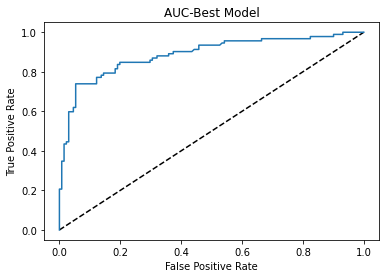

In [65]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Best Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-Best Model')
auc_score=roc_auc_score(y_test,final_mod.predict(x_test))
print(auc_score)

In [66]:
import joblib
joblib.dump(final_mod,'titanic.obj')
mod_from_joblib=joblib.load('titanic.obj')